In [77]:
import requests as rq
import numpy as np

In [60]:
rquest = rq.get('http://0.0.0.0:8080/topology_graph')
json_graph = rquest.json()
json_graph

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 3}, {'id': 2}, {'id': 1}],
 'links': [{'weight': 0,
   'delay': 0,
   'packet_loss': 0,
   'source': 3,
   'target': 3},
  {'weight': 1,
   'lldpdelay': 0.001767873764038086,
   'delay': 0.0010770559310913086,
   'free_bandwith': 9999.998880373209,
   'link_usage': 0.0011192538307793283,
   'packet_loss': 0.0,
   'source': 3,
   'target': 2},
  {'weight': 0, 'delay': 0, 'packet_loss': 0, 'source': 2, 'target': 2},
  {'weight': 1,
   'lldpdelay': 0.0015859603881835938,
   'delay': 0.0010770559310913086,
   'free_bandwith': 9999.998880373209,
   'link_usage': 0.0011192538307793283,
   'packet_loss': 0.0,
   'source': 2,
   'target': 3},
  {'weight': 1,
   'delay': 0.0008786916732788086,
   'lldpdelay': 0.0016460418701171875,
   'free_bandwith': 9999.998720426525,
   'link_usage': 0.0012795734755080771,
   'packet_loss': 0.0,
   'source': 2,
   'target': 1},
  {'weight': 0, 'delay': 0, 'packet_loss': 0, 'source': 1, 

In [22]:
import networkx as nx
import json

# json to networkx object
graph = nx.json_graph.node_link_graph(json_graph)

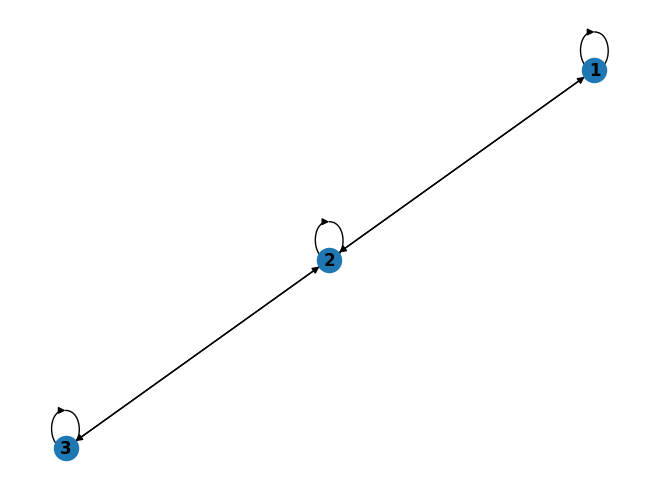

In [23]:
# plot graph
import matplotlib.pyplot as plt
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

In [28]:
# number of nodes and edges
print('Number of nodes: ', graph.number_of_nodes())
print('Number of edges: ', graph.number_of_edges())
# adjacent matrix
print('Adjacent matrix: ', nx.adjacency_matrix(graph).todense())

Number of nodes:  3
Number of edges:  7
Adjacent matrix:  [[0 1 0]
 [1 0 1]
 [0 1 0]]


In [34]:
# adjacency matrix of graph
adjacency_matrix = nx.adjacency_matrix(graph).todense()
adjacency_matrix

matrix([[0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]])

In [50]:
number_node = graph.number_of_nodes()
bin_matrix = nx.adjacency_matrix(graph).todense().tolist()
adj_matrix = [[] for i in range(number_node+1)]
for i in range(1, number_node+1):
    for j in range(1, number_node+1):
        if bin_matrix[i-1][j-1] == 1:
            adj_matrix[i].append(j)

[[], [2], [1, 3], [2]]


In [80]:
# get atrributes of link of nodes
def update_state():
    infor_edges = list(graph.edges(data=True))
    predict_delay =np.zeros((number_node+1, number_node+1))
    predict_packet_loss = np.zeros((number_node+1, number_node+1))
    predict_bandwidth = np.zeros((number_node+1, number_node+1))
    for i in range(len(infor_edges)):
        src = infor_edges[i][0]
        dst = infor_edges[i][1]
        predict_delay[src][dst] = infor_edges[i][2]['delay']
        predict_packet_loss[src][dst] = infor_edges[i][2]['packet_loss']
    return predict_delay, predict_packet_loss, predict_bandwidth

predict_delay:  [[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.00074029]
 [0.         0.         0.00074029 0.        ]]
